In [6]:
import numpy as np
import matplotlib.pyplot as plt
from read_file import *

In [7]:
def get_reference(filename):
    harvest_ref = []
    rows = []
    # reading csv file
    with open(filename, 'r') as csvfile:
        # creating a csv reader object
        csvreader = csv.reader(csvfile)

        # extracting each data row one by one
        for row in csvreader:
            rows.append(row)

    harvest_ref = [float(x) for x in rows[0]]
    return np.array(harvest_ref)

In [8]:
def read_Fd_error(find_vector, rows):
    prev_pull = 0 
    vector = []
    for i, row in enumerate(rows):
        if len(row) > 0:
            compare_str = row[0][0:len(find_vector)]
            if compare_str == find_vector:
                pull = float(row[0][len(find_vector)::])
                vector.append(pull)
                
    return vector

# 07/07/2022

alpha = 25; beta_pg = 0.0001; beta_pp = 0.001; 40 iterations 

In [9]:
filename = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/Training Parametres20220707-2.txt'
find_error = 'Pulling force relative error = '
find_dif = 'Pulling difference = '
find_fd = 'Fd = '
find_compression = 'Compression Loadcell = ['
find_pressure = 'Raspberry Reading = ['
find_pull_grip = 'Pulling Gripper = ['
find_pull = 'Pulling Force = ['
find_time = 'Time vector = ['
fail = 'PICKING FAILED'
ref_p = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/reference20220707.csv"

In [10]:
Fd = read_Fd_error(find_fd, rows)

NameError: name 'rows' is not defined

In [ ]:
force = []
for i in range(0,200,5):
    force.append(Fd[i])

In [ ]:
len(force)

32

In [ ]:
rows = read_csv_file(filename)
ref_pressure = get_reference(ref_p)
fail_index = find_fails(fail, find_fd, rows)
error = read_Fd_error(find_error, rows)
Fd = read_Fd_error(find_fd, rows)
time_vec = read_pressure_pulling_force(find_time, fail_index, rows)
pulling_gripper = read_pressure_pulling_force(find_pull_grip, fail_index, rows)
raspberry_reading = read_pressure_pulling_force(find_pressure, fail_index, rows)
pulling_force = read_pressure_pulling_force(find_pull, fail_index, rows)
compression_loadcell = read_pressure_pulling_force(find_compression , fail_index, rows)
ref_max = max(ref_pressure)


In [ ]:
fail_matrix = np.zeros((40,5))
for i in fail_index:
    iter = int(rows[i-1][0][12:14])
    trial = int(rows[i-1][0][22::])
    fail_matrix[iter-1, trial] = 1


In [ ]:
ii = np.where(fail_matrix==0)[0]
jj = np.where(fail_matrix==0)[1]
max_matrix = np.zeros((40,5))
for k in range(len(raspberry_reading)):
    max_matrix[ii[k]][jj[k]] = max(raspberry_reading[k])


In [ ]:
list(max_matrix[1]).count(0)
rel_error = [0]*40
mean_max = [0]*40
for i in range(40):
    if list(max_matrix[i]).count(0) < 5:
        rel_error[i] = -(ref_max - (np.sum(max_matrix[i])/(5-list(max_matrix[i]).count(0))))/ref_max
        mean_max[i] = (np.sum(max_matrix[i])/(5-list(max_matrix[i]).count(0)))
    else:
        mean_max[i] = ref_max - ref_max*error[i]

Text(0.5, 1.0, 'Maximum values registered')

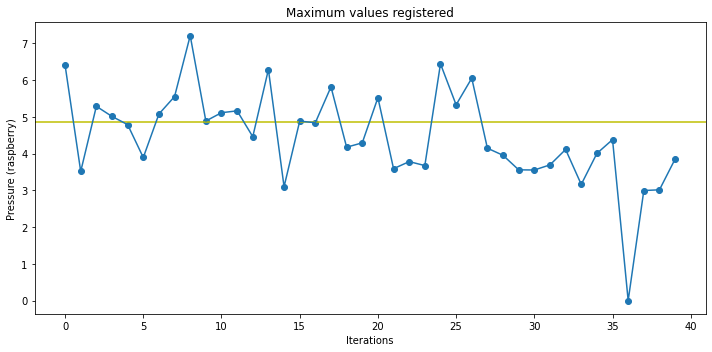

In [ ]:
plt.figure(figsize=(10,5))
plt.axhline(y = ref_max, color = 'y', label = 'reference')
plt.scatter(range(len(mean_max)), mean_max)
plt.plot(range(len(mean_max)), mean_max)
plt.xlabel("Iterations")
plt.ylabel("Pressure (raspberry)")
plt.title('Maximum values registered')

(-50.0, 50.0)

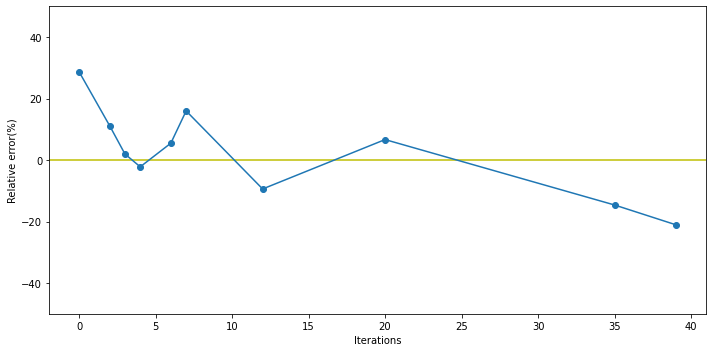

In [ ]:
# Only fully successful iteration
plot_dif0 = []
x_dif = []
for i in range(len(error)):
    if not any(fail_matrix[i]):
        plot_dif0.append(-error[i]*100)
        x_dif.append(i)
plt.figure(figsize=(10,5))
plt.axhline(y = 0, color = 'y', label = 'axhline - full height')
plt.scatter(x_dif, plot_dif0)
plt.plot(x_dif, plot_dif0)
plt.xlabel("Iterations")
plt.ylabel("Relative error(%)")
plt.ylim([-50, 50])

Text(0, 0.5, 'Gripping Force [g]')

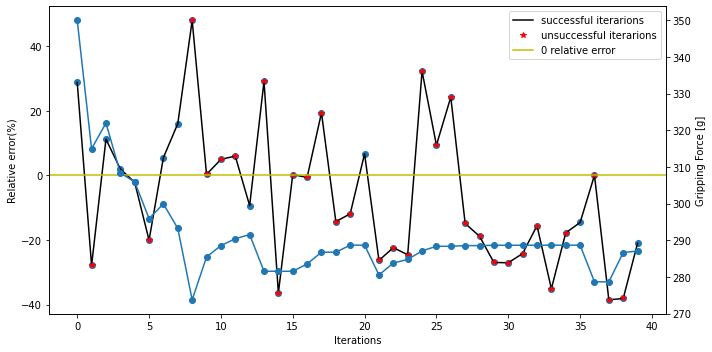

In [ ]:

plot_dif0 = []
x_dif = []
star = []
star_plot = []
for i in range(len(error)):
    if not any(fail_matrix[i]):
        plot_dif0.append(-error[i]*100)
        x_dif.append(i)
    else:
        plot_dif0.append(rel_error[i]*100)
        x_dif.append(i)
        star.append(i)
        star_plot.append(rel_error[i]*100)
plt.figure(figsize=(10,5))
# plt.axhline(y = 0, color = 'y')
plt.rcParams["figure.autolayout"] = True


ax1 = plt.subplot()
ax1.scatter(x_dif, plot_dif0)
ax1.plot(x_dif, plot_dif0,'k', label='successful iterarions')
ax1.plot(star, star_plot,'r*', label='unsuccessful iterarions')
ax1.axhline(y = 0, color = 'y', label = '0 relative error')
ax1.legend(loc="upper right")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Relative error(%)")
ax2 = ax1.twinx()
ax2.scatter(range(40),force)
ax2.plot(range(40), force)
ax2.set_ylabel("Gripping Force [g]")
# plt.legend([l1, l2], ["relative error", "force"])
# plt.scatter(x_dif, plot_dif0)
# plt.plot(x_dif, plot_dif0, label='successful iterarions')
# plt.plot(star, star_plot,'r*', label='unsuccessful iterarions')
# plt.legend(loc="upper right")
# plt.xlabel("Iterations")
# plt.ylabel("Relative error(%)")
# plt.ylim([-50, 50])

In [ ]:
range(len(Fd))

range(0, 200)

Text(0.5, 1.0, 'Maximum values registered')

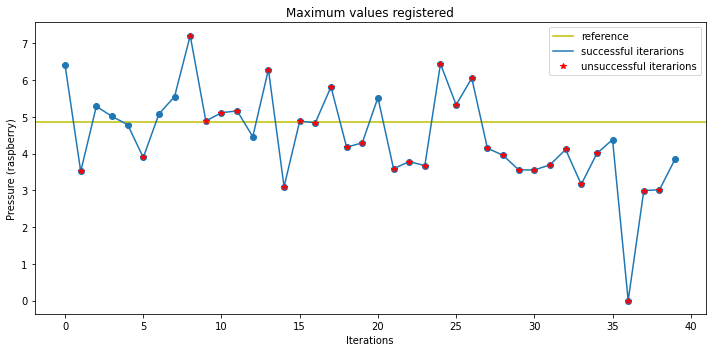

In [ ]:
plt.figure(figsize=(10,5))
plt.axhline(y = ref_max, color = 'y', label = 'reference')
plt.scatter(range(len(mean_max)), mean_max)
plt.plot(range(len(mean_max)), mean_max, label='successful iterarions')
failed = [mean_max[k] for k in star]
plt.plot(star,failed,'r*', label='unsuccessful iterarions')
plt.legend(loc="upper right")
plt.xlabel("Iterations")
plt.ylabel("Pressure (raspberry)")
plt.title('Maximum values registered')

# 10/07/2022

alpha = 25; 32 iterations 

In [ ]:
filename = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/Training Parametres20220710.txt'
find_error = 'Pulling force relative error = '
find_dif = 'Pulling difference = '
find_fd = 'Fd = '
find_compression = 'Compression Loadcell = ['
find_pressure = 'Raspberry Reading = ['
find_pull_grip = 'Pulling Gripper = ['
find_pull = 'Pulling Force = ['
find_time = 'Time vector = ['
fail = 'PICKING FAILED'
ref_p = "D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/reference20220707.csv"

In [ ]:
Fd = read_Fd_error(find_fd, rows)

In [ ]:
force = []
for i in range(0,32*5,5):
    force.append(Fd[i])

In [ ]:
len(force)

32

In [ ]:
rows = read_csv_file(filename)
ref_pressure = get_reference(ref_p)
fail_index = find_fails(fail, find_fd, rows)
error = read_Fd_error(find_error, rows)
Fd = read_Fd_error(find_fd, rows)
time_vec = read_pressure_pulling_force(find_time, fail_index, rows)
pulling_gripper = read_pressure_pulling_force(find_pull_grip, fail_index, rows)
raspberry_reading = read_pressure_pulling_force(find_pressure, fail_index, rows)
pulling_force = read_pressure_pulling_force(find_pull, fail_index, rows)
compression_loadcell = read_pressure_pulling_force(find_compression , fail_index, rows)
ref_max = max(ref_pressure)


In [ ]:
fail_matrix = np.zeros((40,5))
for i in fail_index:
    iter = int(rows[i-1][0][12:14])
    trial = int(rows[i-1][0][22::])
    fail_matrix[iter-1, trial] = 1


NameError: name 'np' is not defined

In [ ]:
ii = np.where(fail_matrix==0)[0]
jj = np.where(fail_matrix==0)[1]
max_matrix = np.zeros((40,5))
for k in range(len(raspberry_reading)):
    max_matrix[ii[k]][jj[k]] = max(raspberry_reading[k])


In [ ]:
list(max_matrix[1]).count(0)
rel_error = [0]*32
mean_max = [0]*32
for i in range(32):
    if list(max_matrix[i]).count(0) < 5:
        rel_error[i] = -(ref_max - (np.sum(max_matrix[i])/(5-list(max_matrix[i]).count(0))))/ref_max
        mean_max[i] = (np.sum(max_matrix[i])/(5-list(max_matrix[i]).count(0)))
    else:
        mean_max[i] = ref_max - ref_max*error[i]

Text(0.5, 1.0, 'Maximum values registered')

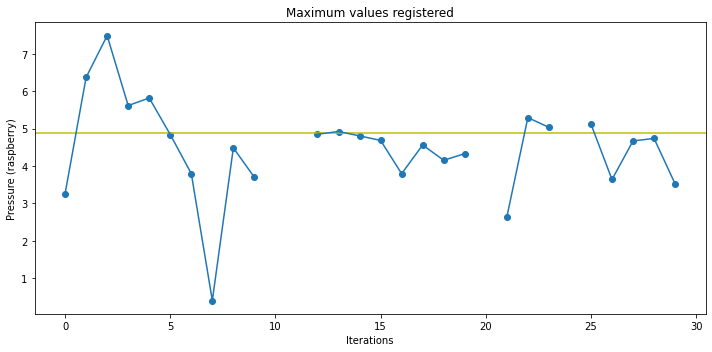

In [ ]:
plt.figure(figsize=(10,5))
plt.axhline(y = ref_max, color = 'y', label = 'reference')
plt.scatter(range(len(mean_max)), mean_max)
plt.plot(range(len(mean_max)), mean_max)
plt.xlabel("Iterations")
plt.ylabel("Pressure (raspberry)")
plt.title('Maximum values registered')

In [ ]:
# Only fully successful iteration
plot_dif0 = []
x_dif = []
for i in range(len(error)):
    if not any(fail_matrix[i]):
        plot_dif0.append(error[i]*100)
        x_dif.append(i)
plt.figure(figsize=(10,5))
plt.axhline(y = 0, color = 'y', label = 'axhline - full height')
plt.scatter(x_dif, plot_dif0)
plt.plot(x_dif, plot_dif0)
plt.xlabel("Iterations")
plt.ylabel("Relative error(%)")
plt.ylim([-50, 60])

NameError: name 'error' is not defined

Text(0, 0.5, 'Gripping Force [g]')

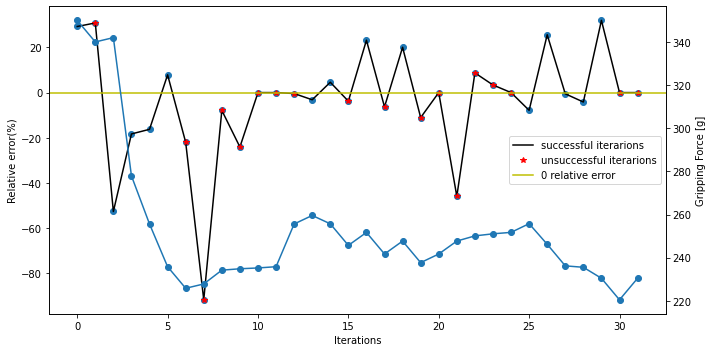

In [ ]:

plot_dif0 = []
x_dif = []
star = []
star_plot = []
for i in range(len(error)):
    if not any(fail_matrix[i]):
        plot_dif0.append(error[i]*100)
        x_dif.append(i)
    else:
        plot_dif0.append(rel_error[i]*100)
        x_dif.append(i)
        star.append(i)
        star_plot.append(rel_error[i]*100)
plt.figure(figsize=(10,5))
# plt.axhline(y = 0, color = 'y')
plt.rcParams["figure.autolayout"] = True


ax1 = plt.subplot()
ax1.scatter(x_dif, plot_dif0)
ax1.plot(x_dif, plot_dif0,'k', label='successful iterarions')
ax1.plot(star, star_plot,'r*', label='unsuccessful iterarions')
ax1.axhline(y = 0, color = 'y', label = '0 relative error')
ax1.legend(loc="center right")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Relative error(%)")
ax2 = ax1.twinx()
ax2.scatter(range(32),force)
ax2.plot(range(32), force)
ax2.set_ylabel("Gripping Force [g]")

# plt.legend([l1, l2], ["relative error", "force"])
# plt.scatter(x_dif, plot_dif0)
# plt.plot(x_dif, plot_dif0, label='successful iterarions')
# plt.plot(star, star_plot,'r*', label='unsuccessful iterarions')
# plt.legend(loc="upper right")
# plt.xlabel("Iterations")
# plt.ylabel("Relative error(%)")
# plt.ylim([-50, 50])

In [ ]:
range(len(Fd))

range(0, 28)

Text(0.5, 1.0, 'Maximum values registered')

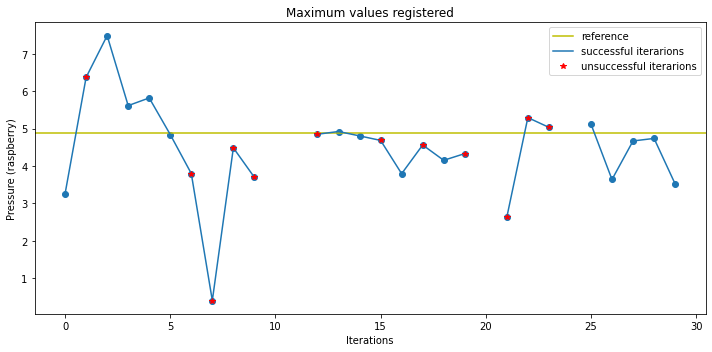

In [ ]:
plt.figure(figsize=(10,5))
plt.axhline(y = ref_max, color = 'y', label = 'reference')
plt.scatter(range(len(mean_max)), mean_max)
plt.plot(range(len(mean_max)), mean_max, label='successful iterarions')
failed = [mean_max[k] for k in star]
plt.plot(star,failed,'r*', label='unsuccessful iterarions')
plt.legend(loc="upper right")
plt.xlabel("Iterations")
plt.ylabel("Pressure (raspberry)")
plt.title('Maximum values registered')